Общая выручка магазина: 912300.0000
Товар, который был продан наибольшее количество раз: NIKE (6190 piece.)
Товар, который принес наибольшую выручку: JORDAN (317000.00 $.)

ОТЧЕТ ПО КАЖДОМУ ТОВАРУ:
Название товара                          Количество продаж              Доля в общей выручке          
NIKE                                     6190                           24.6081%
ADIDAS                                   500                            12.8795%
GUCCI                                    145                            3.0144%
JORDAN                                   2500                           34.7473%
CHANEL                                   1340                           24.7506%


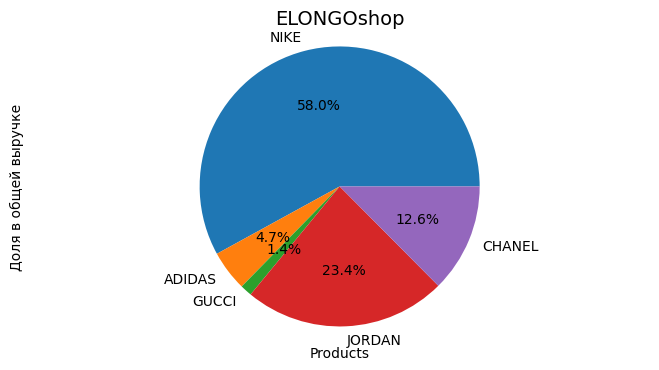

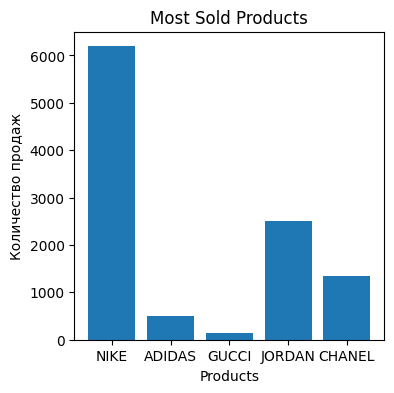

In [24]:
import csv
from collections import defaultdict, Counter
import os
import numpy as np
import matplotlib.pyplot as plt

def read_sales_data(file_path):
    sales_data = []
    try:
        with open(file_path, mode='r', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            sales_data = [row for row in reader]
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
    
    return sales_data


def calculate_total_revenue(sales_data):
    total_revenue = 0
    for item in sales_data:
        total_revenue += float(item['Общая стоимость'])
    return total_revenue


def find_most_sold_product(sales_data):
    product_sales = {}
    for item in sales_data:
        product_name = item['Название товара']
        if product_name not in product_sales:
            product_sales[product_name] = {'name': product_name, 'quantity': 0}
        product_sales[product_name]['quantity'] += int(item['Количество продаж'])
    sorted_products = sorted(product_sales.values(), key=lambda x: x['quantity'], reverse=True)
    return sorted_products[0]['name'], sorted_products[0]['quantity']


def find_highest_revenue_product(sales_data):
    product_revenue = defaultdict(float)
    for item in sales_data:
        product_revenue[item['Название товара']] += float(item['Общая стоимость'])
    highest_revenue_product = max(product_revenue, key=product_revenue.get)
    return [highest_revenue_product, product_revenue[highest_revenue_product]]


def generate_report(sales_data):
    total_revenue = calculate_total_revenue(sales_data)
    most_sold_product, most_sold_quantity = find_most_sold_product(sales_data)
    highest_revenue_product, highest_revenue = find_highest_revenue_product(sales_data)

    product_sales = Counter()
    product_revenue = defaultdict(float)

    for item in sales_data:
        product_sales[item['Название товара']] += int(item['Количество продаж'])
        product_revenue[item['Название товара']] += float(item['Общая стоимость'])

    report = {
        'total_revenue': total_revenue,
        'most_sold_product': most_sold_product,
        'most_sold_quantity': most_sold_quantity,
        'highest_revenue_product': highest_revenue_product,
        'highest_revenue': highest_revenue,
        'product_sales': dict(product_sales),
        'product_revenue': dict(product_revenue)
    }

    return report
  
def print_report(report):
    print(f"Общая выручка магазина: {report['total_revenue']:.4f}")
    print(
        f"Товар, который был продан наибольшее количество раз: {report['most_sold_product']} ({report['most_sold_quantity']} piece.)")
    print(
        f"Товар, который принес наибольшую выручку: {report['highest_revenue_product']} ({report['highest_revenue']:.2f} $.)")

    print("\nОТЧЕТ ПО КАЖДОМУ ТОВАРУ:")
    
    print(f"{'Название товара':<40} {'Количество продаж':<30} {'Доля в общей выручке':<30}")
    for product, sales in report['product_sales'].items():
        revenue_share = (report['product_revenue'][product] / report['total_revenue']) * 100
        print(f"{product:<40} {sales:<30} {revenue_share:.4f}%")
if __name__ == "__main__":
    file_path = 'sales_data.csv'
    sales_data = read_sales_data(file_path)
    
    if sales_data:
        report = generate_report(sales_data)
        print_report(report)

products = list(report['product_sales'].keys())
quantities = list(report['product_sales'].values())

plt.figure(figsize=(8, 4))
plt.pie(quantities, labels=products, autopct='%1.1f%%')
plt.axis('equal') 
plt.xlabel('Products')
plt.ylabel('Доля в общей выручке')
plt.title('ELONGOshop', size=14)
plt.show()
plt.figure(figsize=(4, 4))
plt.bar(products, quantities)
plt.xlabel('Products')
plt.ylabel('Количество продаж')
plt.title('Most Sold Products')
plt.show()